In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_data = pd.read_csv("termdeposit_train.csv")
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [14]:
label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col])

In [13]:
X = train_data.drop(columns=['ID', 'subscribed'])
y = train_data['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.906003159557662


In [11]:
test_data = pd.read_csv("termdeposit_test.csv")
for col in categorical_cols:
    test_data[col] = label_encoders[col].transform(test_data[col])
test_predictions = model.predict(test_data.drop(columns=['ID']))
output = pd.DataFrame({'ID': test_data['ID'], 'Subscribed': test_predictions})
output.to_csv('predictions.csv', index=False)

      ID Subscribed
0  38441         no
1  40403         no
2   3709         no
3  37422         no
4  12527         no


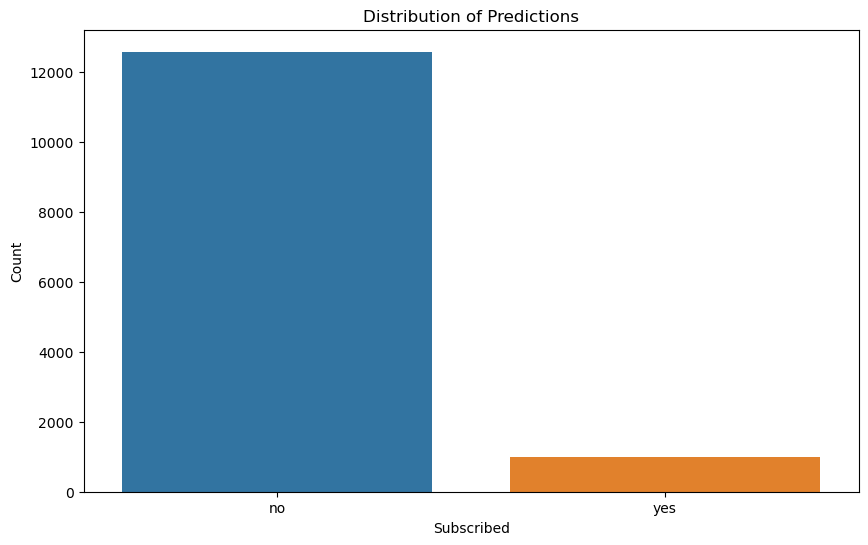

In [12]:
predictions = pd.read_csv("predictions.csv")
print(predictions.head())
prediction_counts = predictions['Subscribed'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=prediction_counts.index, y=prediction_counts.values)
plt.title('Distribution of Predictions')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()